In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

%matplotlib inline

print('Python version:' + sys.version)
print('Pandas version:' + pd.__version__)
print('Matplotlib version:' + matplotlib.__version__)

Python version:3.7.0 (default, Jun 28 2018, 13:15:42) 
[GCC 7.2.0]
Pandas version:0.23.4
Matplotlib version:2.2.3


In [2]:
names = ['Bob', 'Jessica', 'Mary', "John", 'Mel']
births = [968, 155, 77, 578, 973]


In [3]:
BabyDataSet = list(zip(names, births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [4]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [5]:
df.to_csv('births1880.csv', index=False, header=False)

In [6]:
location=r'births1880.csv'

In [7]:
df = pd.read_csv(location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [8]:
df = pd.read_csv(location, names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [9]:
#read_csv?
import os
os.remove(location)

In [10]:
df.dtypes

Names     object
Births     int64
dtype: object

In [11]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)
Sorted['Names'].head(1).values

array(['Mel'], dtype=object)

In [12]:
df['Births'].max()

973

,Names,Births
4,Mel,973


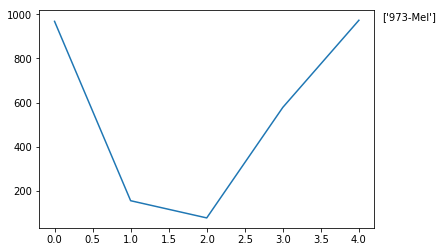

In [13]:
df['Births'].plot()
MaxValue=df['Births'].max()
MaxName = df['Names'][df['Births'] == MaxValue].values
Text = str(MaxValue) + "-" + MaxName
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0),
            xycoords=('axes fraction', 'data'), textcoords='offset points')
df[df['Births'] == MaxValue]

In [14]:
from numpy import random

In [15]:
random.seed(500)
random_names = [names[random.randint(0, len(names))] for i in range(1000)]
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [16]:
births = [random.randint(0, 1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [17]:
BabyDataSet = list(zip(random_names, births))
BabyDataSet[:10]


[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [18]:
df = pd.DataFrame(data=BabyDataSet, columns=['Names', 'Births'])
df.head()
df.tail()

,Names,Births
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


In [19]:
location = 'births1880.txt'
df.to_csv(location, index=False, header=False)

In [20]:
df.head()


,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [21]:
df = pd.read_csv(location)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [23]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


In [24]:
df = pd.read_csv(location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [25]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


In [26]:
df = pd.read_csv(location, names=['Names', 'Births'])
df.head(6)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124


In [27]:
os.remove(location)

In [28]:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [29]:
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [30]:
df['Names'].describe()

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object

In [31]:
name = df.groupby('Names')
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


In [32]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


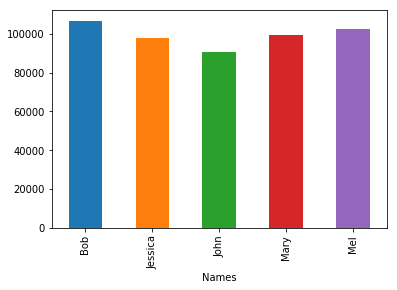

In [33]:
df['Births'].plot.bar()
df.sort_values(by='Births', ascending=False)

In [34]:
random.seed(111)
def CreateDataSet(Number=1):
    Output = []
    for i in range(Number):
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        data = random.randint(low=25, high=1000, size=len(rng))
        status = [1, 2, 3]
        random_status = [status[random.randint(0, len(status))] for i in range(len(rng))]
        
        states = ['GA', 'FL', "fl", 'NY', "NJ", 'TX']
        
        random_states = [states[random.randint(0, len(states))] for i in range(len(rng))]
        
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [35]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [36]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [37]:
df.to_excel('lesson3.xlsx', index=False)


In [38]:
location = 'lesson3.xlsx'
df = pd.read_excel(location, 0, index_col='StatusDate')

In [39]:
df.describe()

,Status,CustomerCount
count,836.000000,836.000000
mean,2.021531,512.520335
std,0.815723,285.716921
min,1.000000,26.000000
25%,1.000000,259.750000
50%,2.000000,515.500000
75%,3.000000,753.000000
max,3.000000,999.000000


In [40]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [41]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [42]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [43]:
df['State'] = df.State.apply(lambda x: x.upper())
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [44]:
mask = df['Status'] == 1
df = df[mask]
df

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291
2009-04-27,NJ,1,753
2009-05-25,TX,1,46
2009-07-06,FL,1,723
2009-07-20,FL,1,710


In [45]:
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

In [46]:
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

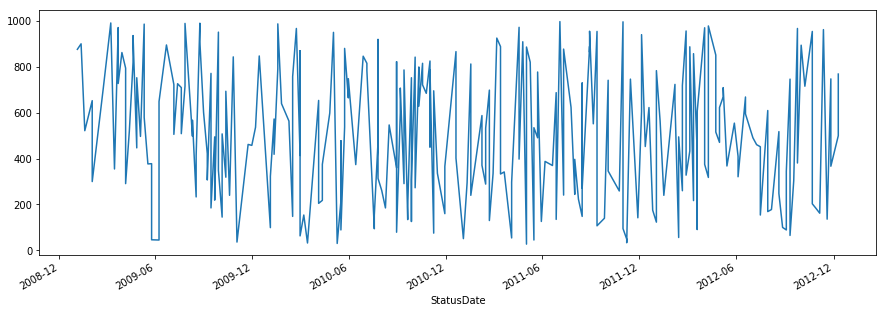

In [47]:
df['CustomerCount'].plot(figsize=(15,5))

In [48]:
sortdf = df[df['State'] == 'NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


In [49]:
Daily = df.reset_index().groupby(['State', 'StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

In [50]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [51]:
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-02-1

In [52]:
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

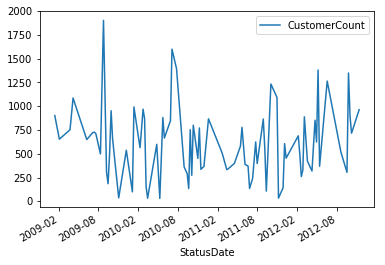

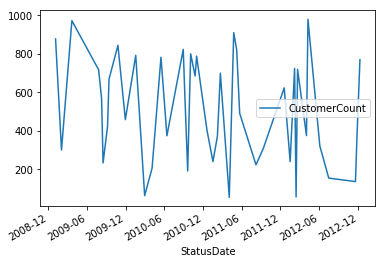

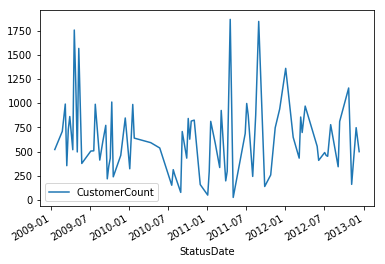

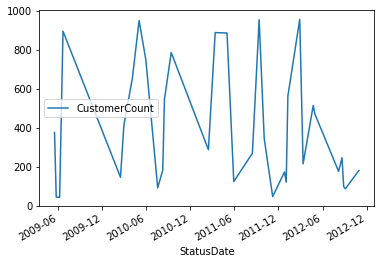

In [53]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()